<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230103_Online_Food_Order_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/06/07/online-food-order-prediction-with-machine-learning/

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [60]:
cols = [i.lower().replace(' ', '_') for i in data.columns]
data.columns = cols

In [61]:
data.head()

,age,gender,marital_status,occupation,monthly_income,educational_qualifications,family_size,latitude,longitude,pin_code,output,feedback,unnamed:_12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [62]:
for i in data.columns:
  print(i)
  print(data[i].unique())
  print('***********'*10)

age
[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
**************************************************************************************************************
gender
['Female' 'Male']
**************************************************************************************************************
marital_status
['Single' 'Married' 'Prefer not to say']
**************************************************************************************************************
occupation
['Student' 'Employee' 'Self Employeed' 'House wife']
**************************************************************************************************************
monthly_income
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
**************************************************************************************************************
educational_qualifications
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
**************************************************************

In [63]:
data.isnull().sum()

age                           0
gender                        0
marital_status                0
occupation                    0
monthly_income                0
educational_qualifications    0
family_size                   0
latitude                      0
longitude                     0
pin_code                      0
output                        0
feedback                      0
unnamed:_12                   0
dtype: int64

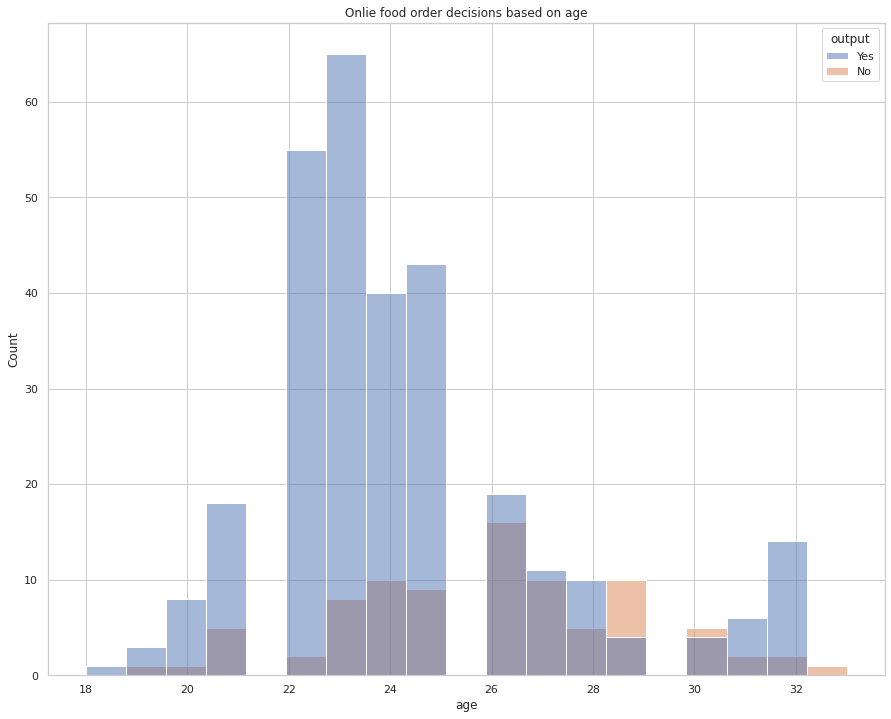

In [64]:
i = 'age'
j = 'output'
plt.figure(figsize=(15,12))
plt.title(f'Onlie food order decisions based on {i}')
sns.histplot(x=i, hue=j, data=data)
plt.show()

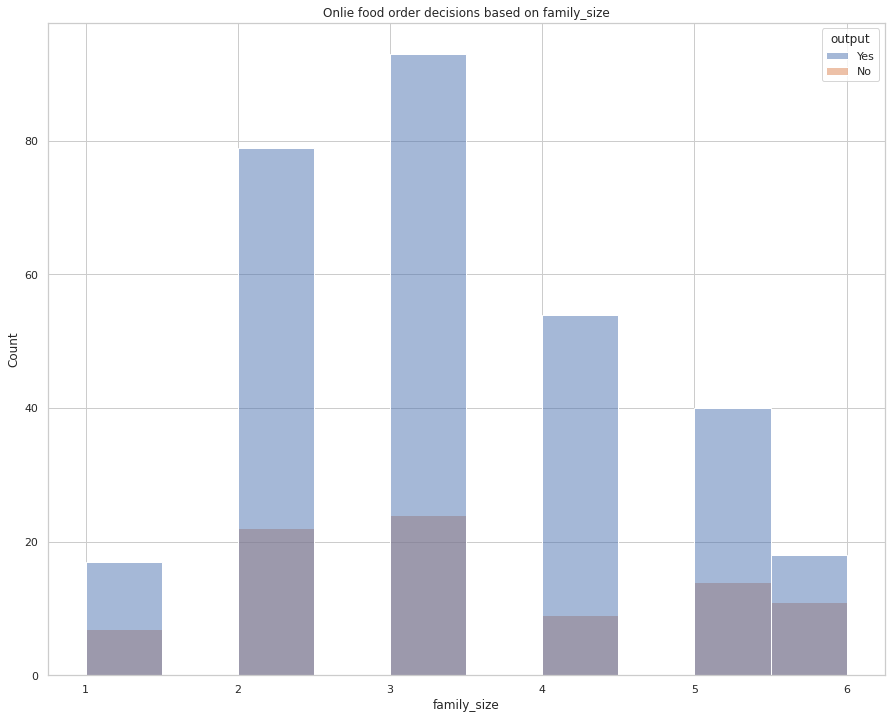

In [65]:
i = 'family_size'
j = 'output'
plt.figure(figsize=(15,12))
plt.title(f'Onlie food order decisions based on {i}')
sns.histplot(x=i, hue=j, data=data)
plt.show()

In [66]:
buy_again = data[data.output == 'Yes']

In [67]:
x = 'gender'
label = buy_again[x].value_counts().index
counts = buy_again[x].value_counts().values
colors = ['red', 'blue']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text=f'Who order food more, by {x}')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))

In [68]:
x = 'marital_status'
label = buy_again[x].value_counts().index
counts = buy_again[x].value_counts().values
colors = ['red', 'blue']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text=f'Who order food more, by {x}')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))

In [69]:
x = 'monthly_income'
label = buy_again[x].value_counts().index
counts = buy_again[x].value_counts().values
colors = ['red', 'blue']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text=f'Who order food more, by {x}')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=3)))

In [70]:
data.columns

Index(['age', 'gender', 'marital_status', 'occupation', 'monthly_income',
       'educational_qualifications', 'family_size', 'latitude', 'longitude',
       'pin_code', 'output', 'feedback', 'unnamed:_12'],
      dtype='object')

In [71]:
to_encode = ['gender', 'marital_status', 'occupation', 
       'educational_qualifications', 'feedback', 'monthly_income']

In [72]:
le = LabelEncoder()

In [73]:
for i in to_encode:
  data[f'le_{i}'] = le.fit_transform(data[i])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            388 non-null    int64  
 1   gender                         388 non-null    object 
 2   marital_status                 388 non-null    object 
 3   occupation                     388 non-null    object 
 4   monthly_income                 388 non-null    object 
 5   educational_qualifications     388 non-null    object 
 6   family_size                    388 non-null    int64  
 7   latitude                       388 non-null    float64
 8   longitude                      388 non-null    float64
 9   pin_code                       388 non-null    int64  
 10  output                         388 non-null    object 
 11  feedback                       388 non-null    object 
 12  unnamed:_12                    388 non-null    obj

In [75]:
data = data.drop('unnamed:_12', axis=1)

In [76]:
data[data.output == 'Yes']

,age,gender,marital_status,occupation,monthly_income,educational_qualifications,family_size,latitude,longitude,pin_code,output,feedback,le_gender,le_marital_status,le_occupation,le_educational_qualifications,le_feedback,le_monthly_income
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,0,2,3,2,1,4
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,0,2,3,0,1,2
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,1,2,3,2,0,2
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,0,2,3,0,1,4
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,1,2,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,0,2,3,2,1,4
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,0,2,3,2,1,4
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,0,2,3,2,1,4
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,1,2,3,2,1,2


In [77]:
x = np.array(data[['age', 'le_gender', 'le_marital_status', 'le_occupation', 'le_monthly_income', 'le_educational_qualifications', 'family_size', 'pin_code', 'le_feedback']])
y = np.array(data[['output']])

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((329, 9), (59, 9), (329, 1), (59, 1))

In [79]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

<ipython-input-79-ac25374a2c06>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9661016949152542

In [80]:
a = 22
b = 1
c = 1
d = 1
e = 0
f = 1
g = 3
h = 560010
i = 1

In [81]:
features = np.array([[a, b, c, d, e, f, g, h, i]])

In [82]:
model.predict(features)

array(['Yes'], dtype=object)